<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Web Services and APIs

---
![](assets/opening.png)

### Learning Objectives
*After this lesson, you will be able to:*
- Describe APIs and how to make calls and consume API data.
- Access public APIs and get information back.
- Read and write data in JSON format.
- Use the `requests` library.

### Lesson Guide
- [Introduction to APIs](#intro)
- [What is an API?](#what-is-api)
- [Famous APIs](#famous)
    - [Facebook](#facebook)
    - [Yelp](#yelp)
    - [Echonest](#echonest)
- [Web APIs](#web-apis)
- [Separation of concerns](#mvc)
- [HTTP](#http)
- [Web applications](#web-app)
- [Demo: HTTP](#demo-http)
- [Independent practice: HTTP](#ind-http)
- [HTTP Request](#http-request)
    - [HTTP Request methods](#request-methods)
    - [HTTP Request structure](#request-structure)
- [HTTP Response](#http-response)
    - [Response types overview](#response-types)
- [JSON](#json)
- [Where to locate API's](#locating-apis)
- [Code Along: Foursquare API](#codealong)
- [Pair practice: OMDB API](#pair-practice)
- [Closing questions](#closing-questions)

### Intro checkout: What is an API? Give 2 different examples


## Has anyone used or is currently using an API?
<br>

**Warning Signs!**
<img src="assets/warning.png" style="float: left; width: 300px; margin: -5px 50px">


- _Random data found all over computer_

- _Withdrawls from friends and family_

- _Constantly iterating over nested JSON_

- _Lack of sleep_

- _Talks about JSON as if a real person_


<a name="intro"></a>
## Introduction to APIs

---

In this lesson we will be diving into the world of APIs and taking a tour of one of the most accessible sources of data on the internet.

- **What is meant by an "API"**
- **Common use cases**
- **How to read API documentation**
- **General development workflow with APIs**


<a id='what-is-api'></a>
## What is an API?

---

An API (Application Programming Interface) is a set of routines, protocols, and tools for building software applications. It specifies how software components should interact.

APIs are a way developers abstract functionality to data, devices, and other resources they provide. 

Some examples include:

- Connectivity to a variety of databases
- IoT (ie: Python modules that can turn LED lights on and off)
- Application that runs on native Windows, OSX, or Linux
- Libraries that post content on Twitter, Facebook, Yelp, or LinkedIn
- Web services for accessing currency or stock prices

More abstract examples:

- Pandas https://pandas.pydata.org/pandas-docs/stable/api.html
- Adding your own functions to Numpy itself
- Extending Python with C code
- Testing Frameworks

In the context of data science, APIs are a very common method to interact with data hosted by third parties and most commonly provided by **Web Service APIs**.

<a id='web-apis'></a>
## Web APIs

---

<img src="./assets/notify.png" width="400" height="200">

The prevelance of web APIs have increased 10x with the rise of Javascript and advent of web programming techniques allowing for the transmission of small pieces of data without having to refresh the entire page.

With the growth of highly interactive websites, provided by AJAX programming techniques in Javascript, many languages have started co-opting standards to communicate data to and from web servers for two big reasons:
- Ease of integration
- Consistent standards


<a id='famous'></a>
<a id='facebook'></a>

### Famous APIs:  Facebook

Facebook provides a RESTful HTTP-based  API for interacting with their service.  At a glance:

- View your posts
- View websites, people, posts, pages that you've liked
- View activity on apps from you and your friends
  - Movies watched
  - Music listened
  - Games played
- View places traveled / check-ins
- Relationships
- but also much more: https://developers.facebook.com/products

#### Potential Project Ideas:

-|-|-|-   
---|---|---|---
Determining Latent Characteristics | Friends Activity | Political Classification | Text Mining 
Friend Classifier | Trending Topics | Recommenders | Feature Importances 
Taste Profiling | Hipster Detector | Sub-group Identification | Checkin-Prediction 
Relationship Forcasting | Relationship Classification | Sentiment Analysis | Popularity Projection 
Personal Analytics | Friend Similarity Prediction | N-Gram Analysis | Topic Modeling 

<a id='yelp'></a>
### Famous APIs:  Yelp

Yelp provides a way for developers to access:

- Reviews
 - Services
 - Restaraunts / Bars / Cafes
 - Businesses
- Business meta-data

#### Potential Project Ideas

-|-|-|-
---|---|---|---
Topic Modeling | Text Mining | Sentiment Analysis | Funny / Cool / Interesting Classification |
Music Genre Classification | Parking Index Classification | Characteristics Profiling | Hipster Index 
Ideal Activities | Friend Recommender | Venue Recommender | Sports Bar Classifcation 
Where is the best [whatever] in [neighborhood] |-|-|-

<a name="mvc"></a>
## Separation of concerns

---

In order to talk about APIs, we need first to introduce the **separation of concerns**. In computer science, _separation of concerns_ (SoC) is a design principle for separating a computer program into distinct sections, such that each section addresses a separate concern. A concern is a set of informations that affects the code of a computer program. 

In particular, when building a web application, it's best practice to separate the website logic from data models. This not only allows for cleaner code, but is an easier way to manipulate our layouts and interactions. Separation of concerns becomes ever more important when working with outside data.

<img src="assets/MVC-Process.png" style="width: 200px;"> 

- The model is responsible for managing the data of the application. It receives user input from the controller.
- The view means presentation of the model in a particular format.
- The controller is responsible for responding to the user input and perform interactions on the data model objects. 

> _MVC: Model View Controller, is a famous SoC paradigm in programming._ 

An example of MVC:
    - Model -> HTML
    - View -> CSS
    - Controller -> Browser


API calls are really a fancy term for making _HTTP requests_ (in the context of web APIs) to a server and sending/receiving structured data from that endpoint (URL). We are still communicating with URLs, however instead of receiving markup, like we do with HTML pages, we receive data.

[Representational state transfer (REST)](https://en.wikipedia.org/wiki/Representational_state_transfer) is the most common architecture style for passing information to and from these API endpoints.



### What does RESTful API mean?

- REST = REpresentational State Transfer and is a style of software architecture. 
- The principles of REST are:
    - Resources expose easily understood directory structure URIs.
    - Representations transfer JSON or XML to represent data objects and attributes.
    - Messages use HTTP methods explicitly (for example, GET, POST, PUT, and DELETE).
    - Stateless interactions store no client context on the server between requests. State dependencies limit and restrict scalability. The client holds session state.

https://en.wikipedia.org/wiki/Representational_state_transfer
- This "architectural style" basically exploits the existing technology and protocols of the Web (GET, POST, PUT, and DELETE).
- RESTful is typically used to refer to web services implementing such an architecture.


Before we start consuming these services however, it's important to understand the fundamentals of the underlying communication layer: **HTTP**.


<a id='http'></a>
## HTTP / HTTPS

---

HTTP is a protocol - a system of rules - that determines how web pages (see:'hypertext') get sent (see:'transferred') from one place to another. Among other things, it defines the format of the messages passed between HTTP clients and HTTP servers.

Since the web is a service, it works through a combination of clients which _make_ requests and servers (which _receive_ requests).

HTTPS is the same protocol using a layer of encryption ((TLS) Transport Layer Security, or formerly, its predecessor, Secure Sockets Layer (SSL)) for secure communication over the different transfers required.

### The HTTP client

HTTP Clients make or generate HTTP Requests. Some types of clients are:

* Browsers - Chrome, Firefox and Safari.
* Command Line programs - [curl](http://curl.haxx.se/docs/) and [wget](http://www.gnu.org/software/wget/manual/wget.html).
* Application code -  Python Requests, Scrapy, Mechanize

HTTP Clients respond to HTTP Responses from a Web Server. They process the data being returned form a Web Server, aka HTTP Server.

### HTTP and web servers

All _Web Servers_ receive _HTTP Requests_ and generate _HTTP Responses_. Often **Web Servers are just the middleman**, passing HTTP Request and Responses between the client and web application. Two of the most popular _HTTP or Web servers_ are [Apache](http://httpd.apache.org/) and [Nginx](http://nginx.com/), But there are lots different [web servers](http://en.wikipedia.org/wiki/Comparison_of_web_server_software) out there.


<a id='web-app'></a>
## Web applications

---

Web applications are programs that run on a web server, process the HTTP requests that the server receives, and generate HTTP Responses.

![HTTP Request and Response](assets/request-response.png)

Lost? Here's the play-by-play.

1. A client sends a HTTP Request to a HTTP Server running on a remote machine.  
  * The _hostname_ given in the URL, indicates which server will receive the request.  
2. The HTTP server processes the HTTP Request. This may entail passing the request to some Web Application, which creates a HTTP Response.
3. The response gets sent back to the client.
4. The client processes the response.

How does the server know what the request is asking for? This is specified by the URL, a special kind of path that specifies where a resource can be found on the web.

![URL](./assets/http1-url-structure.png)



<a name="demo-http"></a>
## Demo: HTTP

---

Lets explore HTTP resources. We'll start by looking at HTTP requests and responses using the Chrome Inspector.

![HTTP Request and Response](./assets/http_request_response.jpeg "HTTP Request and Response")

* In Chrome, open up Chrome Inspector (*command + option + 'i', or ctrl + click and select 'inspect element'*).
* Select the Network tab. It should look something like this:

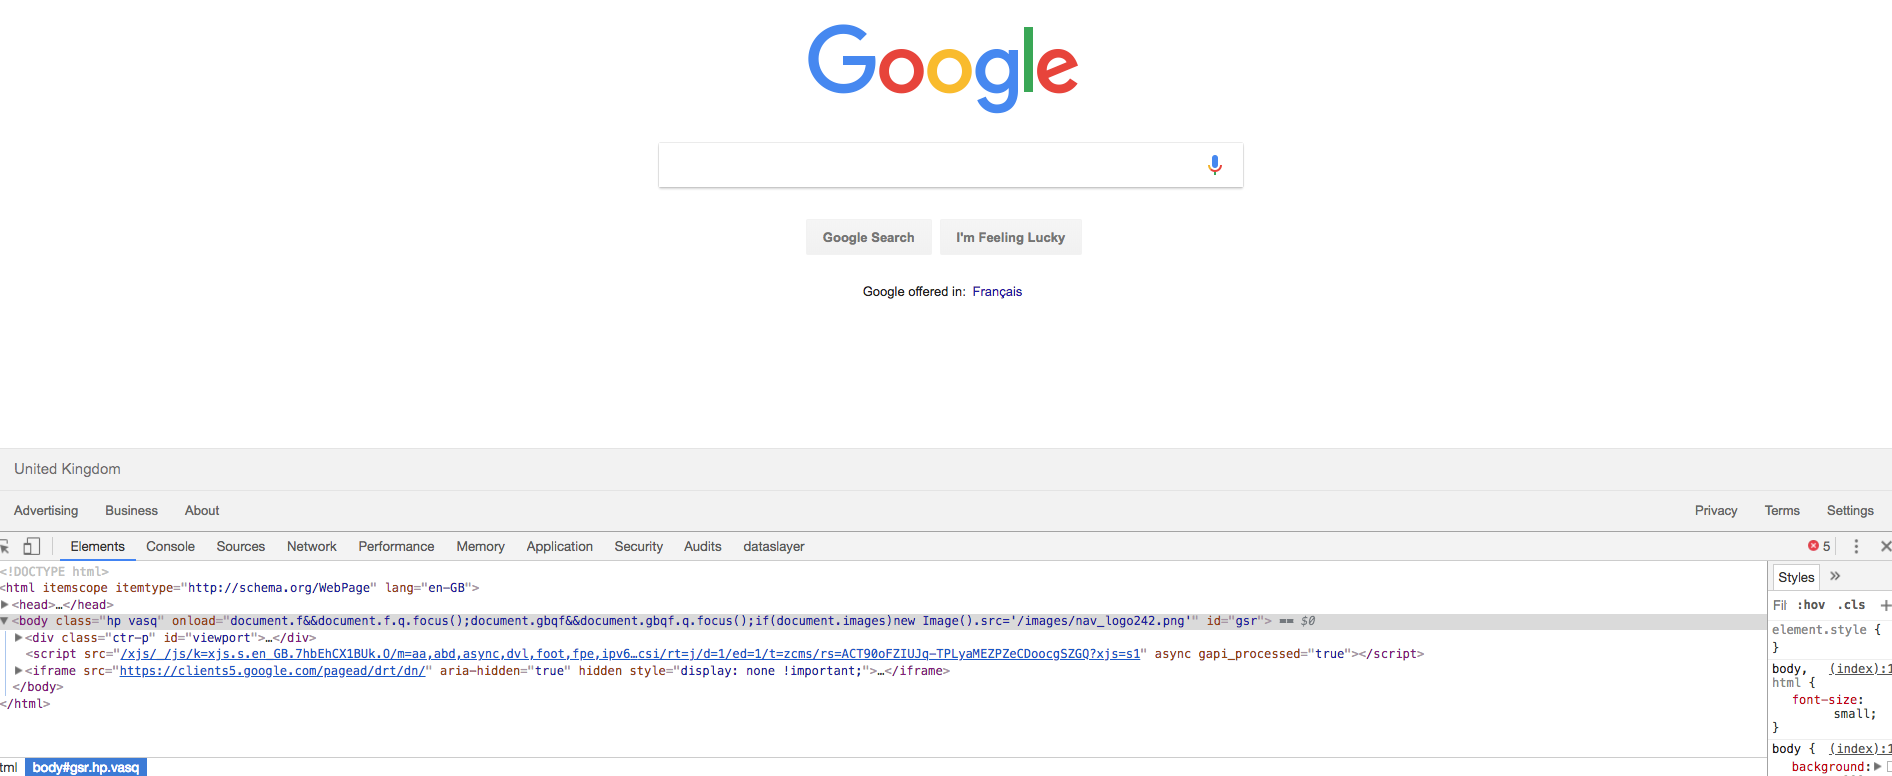

* Next, go to the URL https://generalassemb.ly/

You should be able to see a few HTTP Requests and Responses in the Network tab; for each request you'll see a **Path**, **Method**, **Status**, **Type**, and **Size**, along with info about how long it took to get each of these resources.
  * Most of this information comes from the HTTP Request and Response.*
  * Some HTTP requests are for CSS, JavaScript and images that are referenced by the HTML.
  * Select `generalassemb.ly` in the Path column on the far left.
  * Select the Headers tab. **Headers** are meta-data properties of an HTTP request or response, separate from the body of the message.

<a id='http-request'></a>
## HTTP Request

---

The first word in the request line, _GET_, is the **HTTP Request's Method**.

![HTTP Request](./assets/http_request.jpeg "HTTP Request")

<a id='request-methods'></a>
### HTTP Request methods:

* **`GET`** => Retrieve a resource.  
* **`POST`** => Create a resource.  
* **`PATCH`** (_or **`PUT`**, but **`PATCH`** is recommended_) => Update an existing resource.  
* **`DELETE`** => Delete a resource.  
* **`HEAD`** => Retrieve the headers for a resource.

Of these, **`GET`** and **`POST`** are the most widely used.

<a id='request-structure'></a>
### HTTP Request structure:

```
[http request method] [URL] [http version]  
[list of headers]

[request body]
```
**Note**:  
- The **HTTP request body** is the one which carries actual HTTP request data (including form and uploaded data). 
- The **HTTP response body** returns the data from the server ( including files, images etc). 
- The **request header** will carry the meta-data of the call like the address the credentials the language, etc. and can't not contain actual data like as above.

*Notice, that the Request Header is separated from the Request Body by a new line. They are sent together.*

**HTTP Request Method Example: (No Body)**

    GET http://vermonster.com HTTP/1.1  
    Accept:text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8  
    Accept-Encoding:gzip,deflate,sdch
    Accept-Language:en-US,en;q=0.8  
    Connection:keep-alive  
    Host:vermonster.com  
    User-Agent:Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_5)  
    AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1659.2 Safari/537.36  

<a id='http-response'></a>
## HTTP Response

---

![HTTP Response](./assets/http_response.jpeg "HTTP Response")

When a client sends a request, the server sends back a response; the standard format for this response is:

```
[http version] [status] [reason]  
[list of headers]

[response body] # typically HTML, JSON, ...  
```

<a id='response-types'></a>
### Response types overview

> Check these out when you have time -- at least be aware that there is an expected pattern to these codes:

**[Status Codes](http://en.wikipedia.org/wiki/List_of_HTTP_status_codes)** have standard meanings; here are a few.

|Code|Reason|
|:---|:-----|
|200| OK
|301| Moved Permanently
|302| Moved Temporarily
|307| Temporary Redirect
|400| Bad Request
|403| Forbidden
|404| Not Found
|500| Internal Server Error

<a id='ind-http'></a>

## Pair practice: HTTP

---


### Go to your favorite website(s) (safe for work ;-) ), inspect the protocol from the Chrome network inspection tool (cmd-opt-i), identify:

- Requests sent by your client
- Requests send by the server


#### Research and Explain:
- age
- content-encoding
- "GET" and "POST" requests
- query string parameters

#### Bonus:
What are cookies?
<img src="assets/cookies.png" style="width: 100px">

<a name="json"></a>
## JSON

---

JSON is short for _JavaScript Object Notation_, and is a way to store information in an organized, easy-to-access manner. In a nutshell, it gives us a human-readable collection of data that we can access in a really logical manner.

**JSON is built on two structures:**
* A collection of name/value pairs. In various languages, this is realized as an object, record, structure, dictionary, hash table, keyed list, or associative array.
* An ordered list of values. In most languages, this is realized as an array, vector, list, or sequence.

These are universal data structures. Virtually all modern programming languages support them in one form or another. It makes sense that a data format that is interchangeable with programming languages also be based on these structures.

### JSON objects

An object is an unordered set of name/value pairs, like python dictionaries. An object begins with `{` (left brace) and ends with `}` (right brace). Each name is followed by `:` (colon) and the name/value pairs are separated by `,` (comma).

The syntax is as follows:

```
{ string : value, .......}
```
like:
```
{"count": 1, ...}
```
_Seems an awful lot like a python dictionary!?_

**Note:** Although they look alike, JSON is language agnostic (ie: will work with any programming language). One consequence is that `'` are not the equivalent of `"` in a JSON context.

<a name="locating-apis"></a>
## Where to locate APIs

---

- http://www.pythonforbeginners.com/api/list-of-python-apis  
- https://github.com/realpython/list-of-python-api-wrappers

> *What is a Python wrapper?*

- https://www.programmableweb.com/

<a name="codealong"></a>

## Code Along: Querying Foursquare's RESTful API

**Set up:**

We are going to to request information through Foursquare's API. Foursquare is an app that helps you find the perfect places to go with friends. Discover the best food, nightlife, and entertainment around you.

In order to use the API, we need to sign-up and activate the access to it. To do that:  

1) Sign-up to https://developer.foursquare.com/

2) Log in  

3) Create a new app with the Places API - fill in any name and url (not going to be used)

4) Take note of the `Client ID` and `Client Secret`


**Exercise:**


We are going to load the server's response into a python variable using the modules requests and json. 

In [3]:
import pandas as pd
import numpy as np
from pprint import pprint
import requests

In [4]:
client_id = '-----------YOUR client_id-----------'
client_secret = '-----------YOUR client_secret-----------'

In [5]:
url = 'https://api.foursquare.com/v2/venues/explore'


# The parameters are different for every API.
# Make sure to read the documentation: https://developer.foursquare.com/docs/api

params = dict(
  client_id= client_id, 
  client_secret=client_secret, 
  v='20180323',
  ll='51.515086,-0.072265',
  query='steak',
  limit=10
)


# This will fetch the response data
r_ = requests.get(url=url, params=params)

In [ ]:
print(r_.url)

In [7]:
# Let's have a look at the server response:
print(r_.text)

{"meta":{"code":200,"requestId":"5d36b6f79ba3e500317d64a7"},"response":{"suggestedFilters":{"header":"Tap to show:","filters":[{"name":"Open now","key":"openNow"}]},"suggestedRadius":600,"headerLocation":"Spitalfields and Banglatown","headerFullLocation":"Spitalfields and Banglatown, London","headerLocationGranularity":"neighborhood","query":"steak","totalResults":77,"suggestedBounds":{"ne":{"lat":51.52415578011603,"lng":-0.07223035132249664},"sw":{"lat":51.51277555663428,"lng":-0.08720757536746979}},"groups":[{"type":"Recommended Places","name":"recommended","items":[{"reasons":{"count":0,"items":[{"summary":"This spot is popular","type":"general","reasonName":"globalInteractionReason"}]},"venue":{"id":"53b31313498e3030962f7d33","name":"Bife","contact":{},"location":{"address":"40 Middlesex Street","lat":51.5157,"lng":-0.0754378,"labeledLatLngs":[{"label":"display","lat":51.5157,"lng":-0.0754378}],"distance":230,"postalCode":"E1 7EX","cc":"GB","city":"London","state":"Greater London",

In [8]:
# The call requests has a method .json() that returns the request's response as a JSON object:
json_ = r_.json()
pprint(json_)

{'meta': {'code': 200, 'requestId': '5d36b6f79ba3e500317d64a7'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
                                                 'items': [{'reasonName': 'globalInteractionReason',
                                                            'summary': 'This '
                                                                       'spot '
                                                                       'is '
                                                                       'popular',
                                                            'type': 'general'}]},
                                     'referralId': 'e-0-53b31313498e3030962f7d33-0',
                                     'venue': {'beenHere': {'count': 0,
                                                            'lastCheckinExpiredAt': 0,
                                                            'marked': False,
                                                     

                                                            'type': 'general'}]},
                                     'referralId': 'e-0-4b58a4a8f964a5203e6328e3-7',
                                     'venue': {'beenHere': {'count': 0,
                                                            'lastCheckinExpiredAt': 0,
                                                            'marked': False,
                                                            'unconfirmedCount': 0},
                                               'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/steakhouse_',
                                                                        'suffix': '.png'},
                                                               'id': '4bf58dd8d48988d1cc941735',
                                                               'name': 'Steakhouse',
                                                               'pluralName': 'Steakhouses',
       

In [9]:
# As we explained earlier, json_ object are a variant of python dictionary. 
# As a consequence, we can access them in the same way.
json_.keys()

dict_keys(['meta', 'response'])

In [10]:
pprint(json_['response'])

{'groups': [{'items': [{'reasons': {'count': 0,
                                    'items': [{'reasonName': 'globalInteractionReason',
                                               'summary': 'This spot is '
                                                          'popular',
                                               'type': 'general'}]},
                        'referralId': 'e-0-53b31313498e3030962f7d33-0',
                        'venue': {'beenHere': {'count': 0,
                                               'lastCheckinExpiredAt': 0,
                                               'marked': False,
                                               'unconfirmedCount': 0},
                                  'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/steakhouse_',
                                                           'suffix': '.png'},
                                                  'id': '4bf58dd8d48988d1cc941735',
                      

                                              'groups': [],
                                              'summary': 'Nobody here'},
                                  'id': '5477894f498ec574d634576f',
                                  'location': {'address': '46-48 Commercial St',
                                               'cc': 'GB',
                                               'city': 'London',
                                               'country': 'United Kingdom',
                                               'distance': 243,
                                               'formattedAddress': ['46-48 '
                                                                    'Commercial '
                                                                    'St',
                                                                    'London',
                                                                    'Greater '
                                                                

In [11]:
json_['response'].keys()

dict_keys(['suggestedFilters', 'suggestedRadius', 'headerLocation', 'headerFullLocation', 'headerLocationGranularity', 'query', 'totalResults', 'suggestedBounds', 'groups'])

In [12]:
# Let's have a look at the key "response":
steakhouses = {'name':[],
               'postcode':[],
               'latlong':[]}

for item in json_['response']['groups'][0]['items']:
    try:
        steakhouses['name'].append(item['venue']['name'])
    except:
        steakhouses['name'].append('None')

    try:
         steakhouses['postcode'].append(item['venue']['location']['postalCode'])
    except:
        steakhouses['postcode'].append('None')

    try:
        steakhouses['latlong'].append((item['venue']['location']['lat'], 
                                       item['venue']['location']['lng']))
    except:
        steakhouses['latlong'].append('None')

steakhouses = pd.DataFrame(steakhouses)
steakhouses

,name,postcode,latlong
0,Bife,E1 7EX,"(51.5157, -0.0754378)"
1,Omnino,None,"(51.51329283951981, -0.07829723507394994)"
2,Hawksmoor Spitalfields,E1 6BJ,"(51.52147765393434, -0.0756168938529317)"
3,HotBox,E1 6LT,"(51.51716181724916, -0.07335944423861195)"
4,Walter And Monty,None,"(51.514729, -0.079948)"
5,Pitt Cue,EC2M 4YP,"(51.51642215398327, -0.07807236580700622)"
6,Le Relais de Venise,E C2N,"(51.51472701617397, -0.08652679245633464)"
7,Gaucho,EC2M 2PG,"(51.51932812558569, -0.08416869136455682)"
8,Mac And Wild,EC2M 4AE,"(51.516843118582365, -0.07870024808637541)"
9,Smokestak,E1 6LB,"(51.5236384972305, -0.07291113423363176)"


### Exercise: 

Similar to what we just did above, find the category of each of the locations in the JSON and create another column to our dataframe called 'category'.

In [13]:
categories = []
for item in json_['response']['groups'][0]['items']:
    try:
        categories.append(item['venue']['categories'][0]['name'])
    except:
        categories.append('None')
        
steakhouses['category'] = categories

In [14]:
steakhouses

,name,postcode,latlong,category
0,Bife,E1 7EX,"(51.5157, -0.0754378)",Steakhouse
1,Omnino,None,"(51.51329283951981, -0.07829723507394994)",Steakhouse
2,Hawksmoor Spitalfields,E1 6BJ,"(51.52147765393434, -0.0756168938529317)",Steakhouse
3,HotBox,E1 6LT,"(51.51716181724916, -0.07335944423861195)",BBQ Joint
4,Walter And Monty,None,"(51.514729, -0.079948)",Steakhouse
5,Pitt Cue,EC2M 4YP,"(51.51642215398327, -0.07807236580700622)",Steakhouse
6,Le Relais de Venise,E C2N,"(51.51472701617397, -0.08652679245633464)",Steakhouse
7,Gaucho,EC2M 2PG,"(51.51932812558569, -0.08416869136455682)",Steakhouse
8,Mac And Wild,EC2M 4AE,"(51.516843118582365, -0.07870024808637541)",Steakhouse
9,Smokestak,E1 6LB,"(51.5236384972305, -0.07291113423363176)",Steakhouse


<a name="pair-practice"></a>
## Solo Practice: OMDB API

## The OMDB API

The internet movie database is a large collection of data about movies. It can be browsed at the address: http://www.imdb.com/.

What if we wanted to programatically access the data in the database? Unless we are employees of IMDB.com, we probably don't have direct access to their internal database, so we cannot perform SQL queries on their data.

We could use scraping to retrieve data from the web page, and in some cases we will have to do exactly that.

> *Note: check the "Terms of Service" before you scrape a website, you could be infringing their terms.*

In other cases, the website offers a way to programatically access data from their database. That's an API.

In the case of movies, this is offered by http://www.omdbapi.com/

## The Exercise

1. Get a API key from http://www.omdbapi.com/apikey.aspx.
2. Use the requests library to access the OMDB API.
3. Write code that will search for a movie and return the all the ratings for that movie in a dataframe.

e.g.

Rating Source|Rating
---|---
Internet Movie Database|8.6/10
Rotten Tomatoes|93%
Metacritic|90/100

In [ ]:
apikey = '-----------YOUR apikey-----------'

In [16]:
# Let's try this out with Jurassic Park first

url = 'http://www.omdbapi.com/'
movie_search = input('Search a movie name: ')

# Set the parameters for the request
# Read about possible parameters here: http://www.omdbapi.com/
param_dict = {'apikey':apikey,
              't':movie_search}

req_ = requests.get(url, params=param_dict)
json_ = req_.json()


# We are now going to collect each rating
rating_sources = []
ratings = []

for rating in json_['Ratings']:
    rating_sources.append(rating['Source'])
    ratings.append(rating['Value'])
    
ratings_df = pd.DataFrame({'Rating Source':rating_sources,
                           'Rating':ratings})
print('\n------------------------------------------------------------------')
print('Movie ratings for', json_['Title'])
ratings_df

Search a movie name: Jurassic Park

------------------------------------------------------------------
Movie ratings for Jurassic Park


,Rating Source,Rating
0,Internet Movie Database,8.1/10
1,Rotten Tomatoes,91%
2,Metacritic,68/100


Notice that using this link directly in your browser will show the same data:

http://www.omdbapi.com/?apikey=b1323d84&t=Jurassic+Park


<a id='closing-questions'></a>
## Discuss in pairs:



### - What is the easiest aspect of all this to understand?

In [17]:
# A:

### - What is the most challenging aspect to understand?

In [18]:
# A:

### - How would you explain APIs to someone who didn't know anything about them?

In [19]:
# A:

### - Any new ideas for capstone data?

In [20]:
# A: